## 四年来全A成交额基尼系数变迁

分析了一下最近4年来全A股票的成交额集中度情况

<b>时间区间</b>：2017-7-1到2021-7-1

从上一轮传统白马行情到这一轮赛道股行情，覆盖了18年的熊市和之后的疫情，每日的成交额数据剔除未上市和停牌股票

In [1]:
## 计算17年以来全A成交量基尼系数的变迁
## 预期，基尼系数应该是越来越大的，成交额不断向头部集中
## 实际结果不如预期，虽然在20年7月后有明显的上升痕迹，但幅度不大


from typing import List


import numpy as np
from itertools import combinations

def drop_na_zero(x):
    x = x[x != 0]
    x = x.dropna()
    return x

def count_effec(x):
    x = drop_na_zero(x)
    return x.size

def gini(x):
    x = drop_na_zero(x)
    x = np.array(x, dtype=np.float32)
    x = x / 1000000
    n = len(x)
    diffs = sum(abs(i - j) for i, j in combinations(x, r=2))
    return diffs / (2 * n**2 * x.mean())

def top50ratio(x):
    x = drop_na_zero(x)
    
    x = np.array(x, dtype=np.float32)
    
    x.sort()
    
    return x[-50:].sum() / x.sum()


def top20ratio(x):
    x = drop_na_zero(x)
    
    x = np.array(x, dtype=np.float32)
    
    x.sort()
    
    return x[-20:].sum() / x.sum()
    

def get_vol_all(start_date, end_date, stocks = ''):
    # get_bars(security, count, unit='1d',fields=['date', 'open','high','low','close'],
    #     include_now=False, end_dt=None, fq_ref_date=None, df=False)
    if stocks == '':
        stocks = get_all_securities()
    
    # get_price(security, start_date='2015-01-01', end_date='2015-12-31', frequency='daily', fields=None, skip_paused=False, fq='pre', panel=True)
    moneys = get_price(stocks.index.tolist(), start_date=start_date, end_date=end_date, frequency='daily', fields=['money'], skip_paused=False)
    
    # moneys = get_bars(secs, fields=['date', 'money'], )
    
    return moneys.money
    

In [2]:
moneys = get_vol_all('2017-7-1','2021-7-26')

/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:159: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:115: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  round=round)


## 4年来每个交易日可交易股票数量变化

CPU times: user 948 ms, sys: 0 ns, total: 948 ms
Wall time: 950 ms


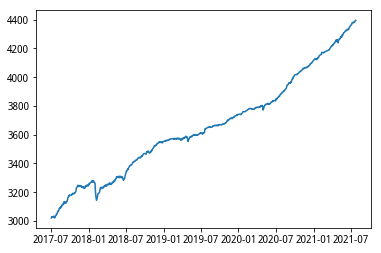

In [3]:
%%time

import pandas as pd

result = pd.DataFrame()

result['n_effect'] = moneys.apply(count_effec, axis=1)

plt.plot(result['n_effect'])

## 基尼系数分析

对全A股票成交额的集中度分析采用基尼系数，基尼系数一般是用来评价一个国家的贫富差距的

百度百科中对基尼系数的定义是：

“基尼系数最大为“1”，最小等于“0”。越接近0表明越趋向平等。国际上并无最适合的基尼系数标准，普遍认为基尼系数小于0.2时，居民收入过于平均，0.2-0.3之间时较为平均，0.3-0.4之间时比较合理，0.4-0.5时差距过大，大于0.5时差距悬殊。”中国国家统计局曾在2015年，公布我国的基尼系数大概是0.462

### 我认为用基尼系数评价成交额集中度还挺合适
### 这一指标能去除股票数量变化和大盘整体成交量波动的影响，看看资金分配在全A股票上的“贫富差距”

CPU times: user 28min 31s, sys: 1.36 s, total: 28min 33s
Wall time: 30min 40s


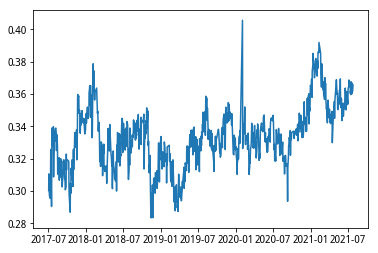

In [4]:
%%time
result['ginis'] = moneys.apply(gini, axis=1)

plt.plot(result['ginis'])

<b>说明: </b>

4年来，基尼系数的峰值出现在2020-02-03，就是新冠经历春节酝酿后的第一个交易日，那天上证指数大概-8%收盘，看来那天大盘股股东的买卖热情都明显大于小盘股股东。峰值只持续了一天，所以就当异常值处理了。

另外有两段非常明显的基尼系数上行期，也就是贫富差距扩大时期，就是2017年下半年到2018年初，和2020年下半年到2021年初，两轮行情的基尼系数峰值相当，都在0.39左右。这两段时期都是众所周知的“抱团”行情，从基尼系数看算是实锤了。

基尼系数大幅下降几乎都出现在指数快速下行的时间段内，可能这就是“拉升总是有限拉升，下跌都是无差别杀跌”？需要后续深入研究吧

## 成交额TOP占比分析

为了防止基尼系数有误，我还做了一个成交额前50占比分析

也就是每日成交额前50的总和占全A成交额的比例。需要注意4年来全A每日可成交股票总数量从3000攀升到4400左右。

CPU times: user 1.18 s, sys: 4.45 ms, total: 1.18 s
Wall time: 1.34 s


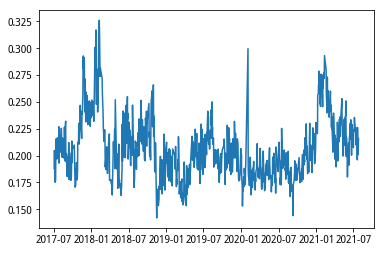

In [5]:
%%time
result['top50ratio'] = moneys.apply(top50ratio, axis = 1)

plt.plot(result['top50ratio'])

<b>说明: </b>

Top50成交额的占比一直在15%到30%之间，整体变化趋势与基尼系数一致，2020年的峰值并未超过2018年的峰值，可能是股票发行数量不断上升的原因。

## 下面再放一张TOP20成交额占比的图佐证一下

CPU times: user 1.22 s, sys: 1 µs, total: 1.22 s
Wall time: 1.25 s


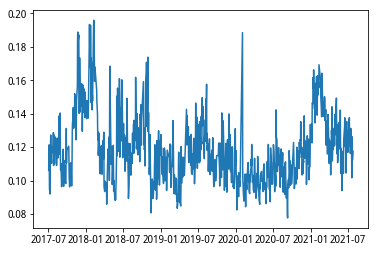

In [6]:
%%time


result['top20ratio'] = moneys.apply(top20ratio, axis = 1)

plt.plot(result['top20ratio'])

<b>说明: </b>

整体趋势与top50一致，但波动似乎没有那么剧烈。top20经常会有一些超过附近交易日的异常放大，可能跟外资指数配置有关吧。


<b>总之,</b> 全A股票成交额的“贫富差距”在分化行情下确实有明显的上升，可以用作评判市场状态的一个指标。后面继续分析成交额集中度与大盘走势、市值集中度的关系吧


In [7]:
moneys.to_csv('volums_in_4_years.csv')
result.to_csv('gini_in_4_years.csv')

## 叠加市值/流通市值来分析成交额gini

## 叠加市值/流通市值来分析top成交额

## 注意大成交额可能和大市值并不完全对应，可计算top50市值与top50成交额之间的重叠率变迁